### 02. Neural network classification with TensorFlow Exercises

1. Play with neural networks in the [TensorFlow Playground](https://playground.tensorflow.org/) for 10-minutes. Especially try different values of the learning, what happens when you decrease it? What happens when you increase it?

2. Replicate the model pictured in the [TensorFlow Playground diagram](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=6,6,6,6,6&seed=0.51287&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularization_hide=true&discretize_hide=true&regularizationRate_hide=true&percTrainData_hide=true&dataset_hide=true&problem_hide=true&noise_hide=true&batchSize_hide=true) below using TensorFlow code. Compile it using the Adam optimizer, binary crossentropy loss and accuracy metric. Once it's compiled check a summary of the model.
![tensorflow playground example neural network](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-tensorflow-playground-replication-exercise.png)
*Try this network out for yourself on the [TensorFlow Playground website](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=6,6,6,6,6&seed=0.51287&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularization_hide=true&discretize_hide=true&regularizationRate_hide=true&percTrainData_hide=true&dataset_hide=true&problem_hide=true&noise_hide=true&batchSize_hide=true). Hint: there are 5 hidden layers but the output layer isn't pictured, you'll have to decide what the output layer should be based on the input data.*

3. Create a classification dataset using Scikit-Learn's [`make_moons()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function, visualize it and then build a model to fit it at over 85% accuracy.

4. Train a model to get 88%+ accuracy on the fashion MNIST test set. Plot a confusion matrix to see the results after.

5. Recreate [TensorFlow's](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) [softmax activation function](https://en.wikipedia.org/wiki/Softmax_function) in your own code. Make sure it can accept a tensor and return that tensor after having the softmax function applied to it.

6. Create a function (or write code) to visualize multiple image predictions for the fashion MNIST at the same time. Plot at least three different images and their prediciton labels at the same time. Hint: see the [classifcation tutorial in the TensorFlow documentation](https://www.tensorflow.org/tutorials/keras/classification) for ideas.

7. Make a function to show an image of a certain class of the fashion MNIST dataset and make a prediction on it. For example, plot 3 images of the `T-shirt` class with their predictions.

### 📖 02. Neural network classification with TensorFlow Extra-curriculum

* Watch 3Blue1Brown's neural networks video 2: [*Gradient descent, how neural networks learn*](https://www.youtube.com/watch?v=IHZwWFHWa-w). After you're done, write 100 words about what you've learned.
  * If you haven't already, watch video 1: [*But what is a Neural Network?*](https://youtu.be/aircAruvnKk). Note the activation function they talk about at the end.
* Watch [MIT's introduction to deep learning lecture 1](https://youtu.be/njKP3FqW3Sk) (if you haven't already) to get an idea of the concepts behind using linear and non-linear functions.
* Spend 1-hour reading [Michael Nielsen's Neural Networks and Deep Learning book](http://neuralnetworksanddeeplearning.com/index.html).
* Read the [ML-Glossary documentation on activation functions](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html). Which one is your favourite?
  * After you've read the ML-Glossary, see which activation functions are available in TensorFlow by searching "tensorflow activation functions".

### 02. Neural network classification with TensorFlow Exercises

**Questionnaire**

1. Create a classification dataset using Scikit-Learn's [`make_moons()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function, visualize it and then build a model to fit it at over 85% accuracy.

2. Train a model to get 88%+ accuracy on the fashion MNIST test set. Plot a confusion matrix to see the results after.

3. Recreate [TensorFlow's](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) [softmax activation function](https://en.wikipedia.org/wiki/Softmax_function) in your own code. Make sure it can accept a tensor and return that tensor after having the softmax function applied to it.

4. Create a function (or write code) to visualize multiple image predictions for the fashion MNIST at the same time. Plot at least three different images and their prediciton labels at the same time. Hint: see the [classifcation tutorial in the TensorFlow documentation](https://www.tensorflow.org/tutorials/keras/classification) for ideas.

5. Make a function to show an image of a certain class of the fashion MNIST dataset and make a prediction on it. For example, plot 3 images of the `T-shirt` class with their predictions.

In [1]:
# Importing the initial use
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### 1. Create a classification dataset using Scikit-Learn's [`make_moons()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function, visualize it and then build a model to fit it at over 85% accuracy.

In [2]:
# Import the make_moons datasets from sklearn datasets
from sklearn.datasets import make_moons

# Make samples
n_samples = 1000

# Create circles and set random seed
X, y = make_moons(n_samples=n_samples,
                 random_state=42)

# Checking the shape of X & y
print(X.shape, y.shape)

# Packing them into a DataFrame
make_moons_df = pd.DataFrame({"col_1": X[:, 0],
                             "col_2": X[:, 1],
                             "label": y})
make_moons_df.head()

(1000, 2) (1000,)


,col_1,col_2,label
0,0.008727,0.368174,1
1,0.921384,-0.496905,1
2,0.940226,-0.498212,1
3,0.465875,-0.345406,1
4,-0.850412,0.526117,0


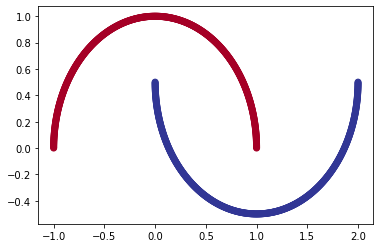

In [3]:
# Let's plot the data to visualization
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [4]:
# Splitting the dataset into train and test 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking the shape of splitting
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [5]:
# Build the model

# set random seed
tf.random.set_seed(42)

# create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
             optimizer=tf.keras.optimizers.Adam(),
             metrics=["accuracy"])

# Fit the model
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
25/25 [==============================] - 1s 3ms/step - loss: 0.6808 - accuracy: 0.5038
Epoch 2/10
25/25 [==============================] - 0s 2ms/step - loss: 0.6388 - accuracy: 0.5125
Epoch 3/10
25/25 [==============================] - 0s 2ms/step - loss: 0.6017 - accuracy: 0.5350
Epoch 4/10
25/25 [==============================] - 0s 2ms/step - loss: 0.5689 - accuracy: 0.6500
Epoch 5/10
25/25 [==============================] - 0s 3ms/step - loss: 0.5388 - accuracy: 0.8475
Epoch 6/10
25/25 [==============================] - 0s 2ms/step - loss: 0.5128 - accuracy: 0.8775
Epoch 7/10
25/25 [==============================] - 0s 2ms/step - loss: 0.4895 - accuracy: 0.8800
Epoch 8/10
25/25 [==============================] - 0s 3ms/step - loss: 0.4690 - accuracy: 0.8788
Epoch 9/10
25/25 [==============================] - 0s 3ms/step - loss: 0.4506 - accuracy: 0.8775
Epoch 10/10
25/25 [==============================] - 0s 2ms/step - loss: 0.4338 - accuracy: 0.8788


In [6]:
# Create a function to visualize how our model is performing
def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicting on X.
    
    Arguments:
        model --> the trained model
        X --> the feature data (numpy array)
        y --> the truth labels
        
    Returns:
        A visualization of how our model is performing (fitting with our data)
    """
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
    
    # Create X values (we're going to predict pn all of these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: learn more https://numpy.org/devdocs/reference/generated/numpy.c_.html
    
    # Make predictions using the trained model
    y_pred = model.predict(x_in)
    
    # Check for multi-class
    if len(y_pred[0]) > 1:
        print("doing multiclass classification...")
        # we have to reshape our predictions to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classification...")
        y_pred = np.round(y_pred).reshape(xx.shape)
        
    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

doing binary classification...


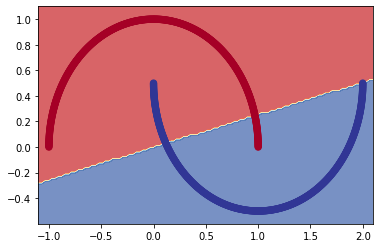

In [7]:
# Plot the decision boundaries
plot_decision_boundary(model, X, y)

### 2. Train a model to get 88%+ accuracy on the fashion MNIST test set. Plot a confusion matrix to see the results after.

# Train Your First Neural Network Classifier - Fashion MNIST
This guide uses the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
</table>

We will use 60,000 images to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow, just import and load the data:

Let's also make sure to import all the libraries that we need in order to run the excercise:

In [8]:
# Import MNIST from keras dataset
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels ), (test_data, test_labels) = fashion_mnist.load_data()

Loading the dataset returns four NumPy arrays:

* The `train_data` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_data`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

## Explore the data

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [9]:
# Check the training data
train_data.shape

(60000, 28, 28)

In [10]:
# Check there 60,000 labels of training set
len(train_labels)

60000

In [11]:
# Each label is an integer between 0 to 9
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [12]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

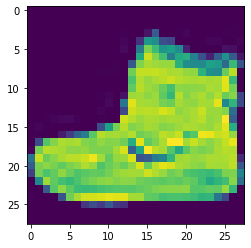

In [13]:
#Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0]);

In [14]:
# Check out sample label
train_labels[0]

9

In [15]:
# There are 10,000 images in the test set
test_data.shape

(10000, 28, 28)

In [16]:
# Create a small list so we can index onto our training labels so they're human-readable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

## Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

In [17]:
# Let's create the function to plot images
def plot_image(images, labels, class_names = None, index=0, colorbar=True, cmap='Greys'):
  plt.figure()
  plt.imshow(images[index], cmap=cmap) # print the image
  if(colorbar == True):
    plt.colorbar()
  plt.show()
  label = labels[index] if class_names is None else class_names[labels[i]]
  print("the label is:", label) # The train label

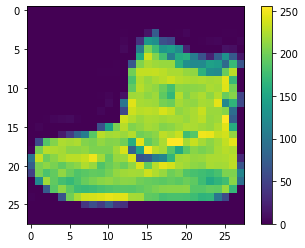

the label is: 9


In [18]:
plot_image(train_data, train_labels, cmap=None)

We scale these values to a range of 0 to 1 before feeding to the neural network model. For this, we divide the values by 255. It's important that the *training set* and the *testing set* are preprocessed in the same way:

In [28]:
# We can get our training and testing data between 0 & 1 by dividing by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check the min and max values of scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

Display the first 25 images from the *training set* and display the class name below each image. Verify that the data is in the correct format and we're ready to build and train the network.

In [20]:
# Create the function to plot multi-images
def plot_multi_images(images, labels, class_names=None, start=0, num_rows=5, num_cols=5, cmap=plt.cm.binary):
  plt.figure(figsize=(2*num_cols, 2*num_rows))
  for i in range(num_cols*num_rows):
    index = i + start
    plt.subplot(num_rows,num_cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[index], cmap=cmap)
    label = labels[index] if class_names is None else class_names[labels[index]]
    plt.xlabel(label)
  plt.show()

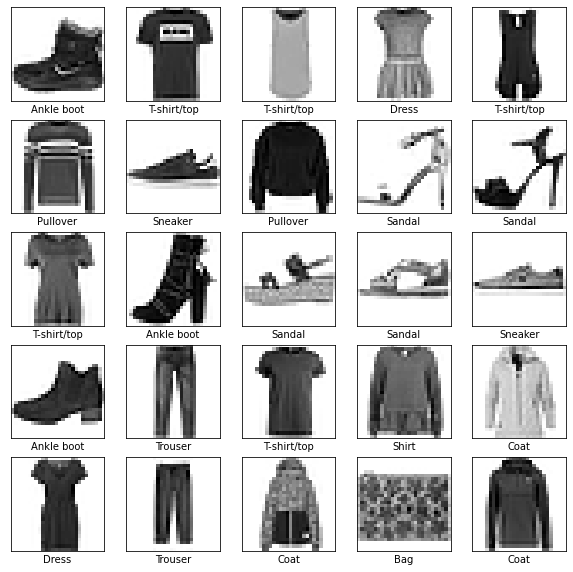

In [21]:
plot_multi_images(train_data, train_labels, class_names)

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

### Setup the layers

The basic building block of a neural network is the *layer*. Layers extract representations from the data fed into them. And, hopefully, these representations are more meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, like `tf.keras.layers.Dense`, have parameters that are learned during training.

In [53]:
# Create the model
mnist_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a 2d-array (of 28 by 28 pixels), to a 1d-array of 28 * 28 = 784 pixels. Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers. These are densely-connected, or fully-connected, neural layers. The first `Dense` layer has 128 nodes (or neurons). The second (and last) layer is a 10-node *softmax* layer—this returns an array of 10 probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.

### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:

* *Loss function* —This measures how accurate the model is during training. We want to minimize this function to "steer" the model in the right direction.
* *Optimizer* —This is how the model is updated based on the data it sees and its loss function.
* *Metrics* —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [54]:
# Compile the model
mnist_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                   optimizer=tf.keras.optimizers.Adam(),
                   metrics=["accuracy"])

## View the model

Summarize model properties:

In [55]:
# model summary
mnist_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Let's create function to draw the model
def draw_model(model, view=True, filename="network.gv", title="Neural Network"):
    """Vizualizes a Sequential model.
    # Arguments
        model: A Keras model instance.
        view: whether to display the model after generation.
        filename: where to save the vizualization. (a .gv file)
        title: A title for the graph
    """
    from graphviz import Digraph;
    import tensorflow as tf;
    import tensorflow.keras as keras;
    from tensorflow.keras.models import Sequential;
    from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten;
    import json;
    input_layer = 0;
    hidden_layers_nr = 0;
    layer_types = [];
    hidden_layers = [];
    output_layer = 0;
    for layer in model.layers:
        if(layer == model.layers[0]):
            input_layer = int(str(layer.input_shape).split(",")[1][1:-1]);
            hidden_layers_nr += 1;
            if (type(layer) == keras.layers.Dense):
                hidden_layers.append(int(str(layer.output_shape).split(",")[1][1:-1]));
                layer_types.append("Dense");
            else:
                hidden_layers.append(1);
                if (type(layer) == keras.layers.Conv2D):
                    layer_types.append("Conv2D");
                elif (type(layer) == keras.layers.MaxPooling2D):
                    layer_types.append("MaxPooling2D");
                elif (type(layer) == keras.layers.Dropout):
                    layer_types.append("Dropout");
                elif (type(layer) == keras.layers.Flatten):
                    layer_types.append("Flatten");
                elif (type(layer) == keras.layers.Activation):
                    layer_types.append("Activation");
        else:
            if(layer == model.layers[-1]):
                output_layer = int(str(layer.output_shape).split(",")[1][1:-1]);
            else:
                hidden_layers_nr += 1;
                if (type(layer) == keras.layers.Dense):
                    hidden_layers.append(int(str(layer.output_shape).split(",")[1][1:-1]));
                    layer_types.append("Dense");
                else:
                    hidden_layers.append(1);
                    if (type(layer) == keras.layers.Conv2D):
                        layer_types.append("Conv2D");
                    elif (type(layer) == keras.layers.MaxPooling2D):
                        layer_types.append("MaxPooling2D");
                    elif (type(layer) == keras.layers.Dropout):
                        layer_types.append("Dropout");
                    elif (type(layer) == keras.layers.Flatten):
                        layer_types.append("Flatten");
                    elif (type(layer) == keras.layers.Activation):
                        layer_types.append("Activation");
        last_layer_nodes = input_layer;
        nodes_up = input_layer;
        if(type(model.layers[0]) != keras.layers.Dense):
            last_layer_nodes = 1;
            nodes_up = 1;
            input_layer = 1;

        g = Digraph('g', filename=filename);
        n = 0;
        g.graph_attr.update(splines="false", nodesep='1', ranksep='2');
        #Input Layer
        with g.subgraph(name='cluster_input') as c:
            if(type(model.layers[0]) == keras.layers.Dense):
                the_label = title+'\n\n\n\nInput Layer';
                if (int(str(model.layers[0].input_shape).split(",")[1][1:-1]) > 10):
                    the_label += " (+"+str(int(str(model.layers[0].input_shape).split(",")[1][1:-1]) - 10)+")";
                    input_layer = 10;
                c.attr(color='white')
                for i in range(0, input_layer):
                    n += 1;
                    c.node(str(n));
                    c.attr(label=the_label)
                    c.attr(rank='same');
                    c.node_attr.update(color="#2ecc71", style="filled", fontcolor="#2ecc71", shape="circle");
                    
            elif(type(model.layers[0]) == keras.layers.Flatten):
                #Conv2D Input visualizing
                the_label = title+'\n\n\n\nInput Layer';
                c.attr(color="white", label=the_label);
                c.node_attr.update(shape="square");
                pxls = str(model.layers[0].input_shape).split(',');
                clr = 1
                if(len(pxls) >3):
                  clr = int(pxls[3][1:-1]);
                if (clr == 1):
                    clrmap = "Grayscale";
                    the_color = "black:white";
                elif (clr == 3):
                    clrmap = "RGB";
                    the_color = "#e74c3c:#3498db";
                else:
                    clrmap = "";
                c.node_attr.update(fontcolor="white", fillcolor=the_color, style="filled");
                n += 1;
                c.node(str(n), label="Image\n"+pxls[1]+" x"+pxls[2]+" pixels\n"+clrmap, fontcolor="white");

            elif(type(model.layers[0]) == keras.layers.Conv2D):
                #Conv2D Input visualizing
                the_label = title+'\n\n\n\nInput Layer';
                c.attr(color="white", label=the_label);
                c.node_attr.update(shape="square");
                pxls = str(model.layers[0].input_shape).split(',');
                clr = int(pxls[3][1:-1]);
                if (clr == 1):
                    clrmap = "Grayscale";
                    the_color = "black:white";
                elif (clr == 3):
                    clrmap = "RGB";
                    the_color = "#e74c3c:#3498db";
                else:
                    clrmap = "";
                c.node_attr.update(fontcolor="white", fillcolor=the_color, style="filled");
                n += 1;
                c.node(str(n), label="Image\n"+pxls[1]+" x"+pxls[2]+" pixels\n"+clrmap, fontcolor="white");
            else:
                raise ValueError("ANN Visualizer: Layer not supported for visualizing");
        for i in range(0, hidden_layers_nr):
            with g.subgraph(name="cluster_"+str(i+1)) as c:
                if (layer_types[i] == "Dense"):
                    c.attr(color='white');
                    c.attr(rank='same');
                    #If hidden_layers[i] > 10, dont include all
                    the_label = "";
                    if (int(str(model.layers[i].output_shape).split(",")[1][1:-1]) > 10):
                        the_label += " (+"+str(int(str(model.layers[i].output_shape).split(",")[1][1:-1]) - 10)+")";
                        hidden_layers[i] = 10;
                    c.attr(labeljust="right", labelloc="b", label=the_label);
                    for j in range(0, hidden_layers[i]):
                        n += 1;
                        c.node(str(n), shape="circle", style="filled", color="#3498db", fontcolor="#3498db");
                        for h in range(nodes_up - last_layer_nodes + 1 , nodes_up + 1):
                            g.edge(str(h), str(n));
                    last_layer_nodes = hidden_layers[i];
                    nodes_up += hidden_layers[i];
                elif (layer_types[i] == "Conv2D"):
                    c.attr(style='filled', color='#5faad0');
                    n += 1;
                    kernel_size = str(model.layers[i].get_config()['kernel_size']).split(',')[0][1] + "x" + str(model.layers[i].get_config()['kernel_size']).split(',')[1][1 : -1];
                    filters = str(model.layers[i].get_config()['filters']);
                    c.node("conv_"+str(n), label="Convolutional Layer\nKernel Size: "+kernel_size+"\nFilters: "+filters, shape="square");
                    c.node(str(n), label=filters+"\nFeature Maps", shape="square");
                    g.edge("conv_"+str(n), str(n));
                    for h in range(nodes_up - last_layer_nodes + 1 , nodes_up + 1):
                        g.edge(str(h), "conv_"+str(n));
                    last_layer_nodes = 1;
                    nodes_up += 1;
                elif (layer_types[i] == "MaxPooling2D"):
                    c.attr(color="white");
                    n += 1;
                    pool_size = str(model.layers[i].get_config()['pool_size']).split(',')[0][1] + "x" + str(model.layers[i].get_config()['pool_size']).split(',')[1][1 : -1];
                    c.node(str(n), label="Max Pooling\nPool Size: "+pool_size, style="filled", fillcolor="#8e44ad", fontcolor="white");
                    for h in range(nodes_up - last_layer_nodes + 1 , nodes_up + 1):
                        g.edge(str(h), str(n));
                    last_layer_nodes = 1;
                    nodes_up += 1;
                elif (layer_types[i] == "Flatten"):
                    n += 1;
                    c.attr(color="white");
                    c.node(str(n), label="Flattening", shape="invtriangle", style="filled", fillcolor="#2c3e50", fontcolor="white");
                    for h in range(nodes_up - last_layer_nodes + 1 , nodes_up + 1):
                        g.edge(str(h), str(n));
                    last_layer_nodes = 1;
                    nodes_up += 1;
                elif (layer_types[i] == "Dropout"):
                    n += 1;
                    c.attr(color="white");
                    c.node(str(n), label="Dropout Layer", style="filled", fontcolor="white", fillcolor="#f39c12");
                    for h in range(nodes_up - last_layer_nodes + 1 , nodes_up + 1):
                        g.edge(str(h), str(n));
                    last_layer_nodes = 1;
                    nodes_up += 1;
                elif (layer_types[i] == "Activation"):
                    n += 1;
                    c.attr(color="white");
                    fnc = model.layers[i].get_config()['activation'];
                    c.node(str(n), shape="octagon", label="Activation Layer\nFunction: "+fnc, style="filled", fontcolor="white", fillcolor="#00b894");
                    for h in range(nodes_up - last_layer_nodes + 1 , nodes_up + 1):
                        g.edge(str(h), str(n));
                    last_layer_nodes = 1;
                    nodes_up += 1;


        with g.subgraph(name='cluster_output') as c:
            if (type(model.layers[-1]) == keras.layers.Dense):
                c.attr(color='white')
                c.attr(rank='same');
                c.attr(labeljust="1");
                for i in range(1, output_layer+1):
                    n += 1;
                    c.node(str(n), shape="circle", style="filled", color="#e74c3c", fontcolor="#e74c3c");
                    for h in range(nodes_up - last_layer_nodes + 1 , nodes_up + 1):
                        g.edge(str(h), str(n));
                c.attr(label='Output Layer', labelloc="bottom")
                c.node_attr.update(color="#2ecc71", style="filled", fontcolor="#2ecc71", shape="circle");

        g.attr(arrowShape="none");
        g.edge_attr.update(arrowhead="none", color="#707070");
        if view == True:
            g.view();


    if view == True:
        import graphviz

        with open(filename) as f:
            dot_graph = f.read()

        return graphviz.Source(dot_graph)

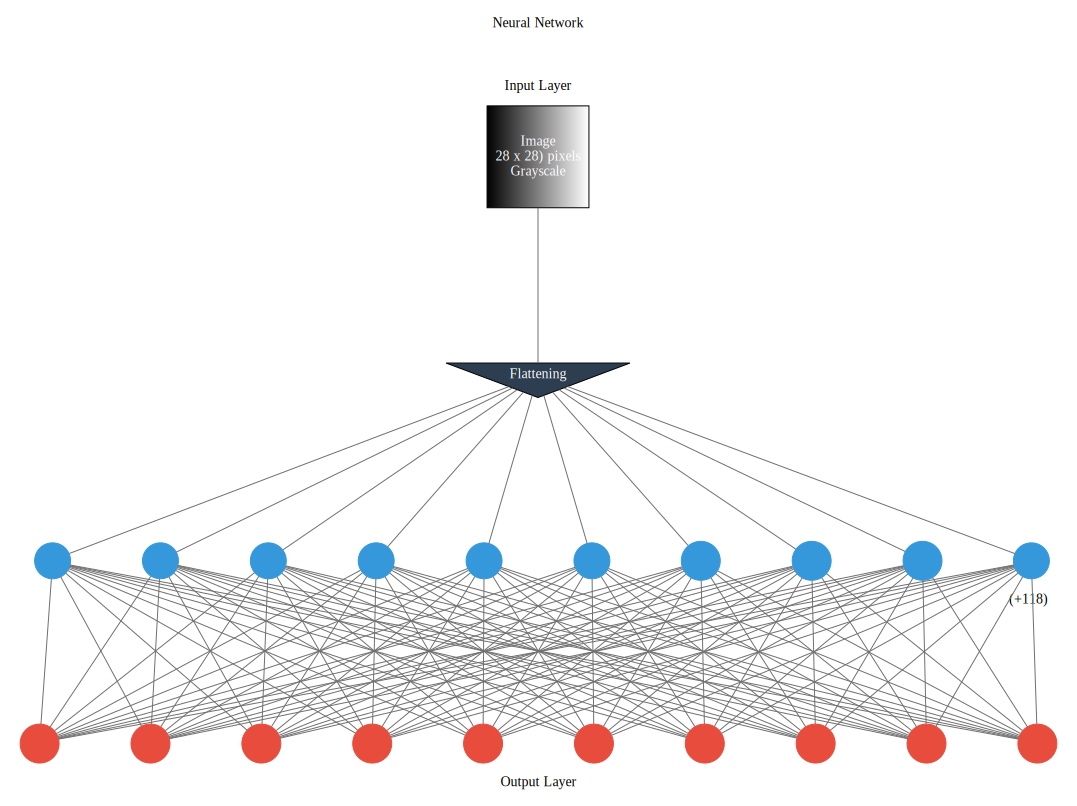

In [27]:
draw_model(mnist_model)

## Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model—in this example, the `train_data` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. We ask the model to make predictions about a test set—in this example, the `test_data` array. We verify that the predictions match the labels from the `test_labels` array.

To start training,  call the `model.fit` method—the model is "fit" to the training data:

In [57]:
# Fit the model
history = mnist_model.fit(train_data_norm, train_labels, validation_data=(test_data_norm, test_labels), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2613 - accuracy: 0.9034 - val_loss: 0.3612 - val_accuracy: 0.8720
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2496 - accuracy: 0.9073 - val_loss: 0.3400 - val_accuracy: 0.8827
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2393 - accuracy: 0.9116 - val_loss: 0.3610 - val_accuracy: 0.8719
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2309 - accuracy: 0.9148 - val_loss: 0.3375 - val_accuracy: 0.8805
Epoch 5/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2234 - accuracy: 0.9162 - val_loss: 0.3424 - val_accuracy: 0.8803
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2158 - accuracy: 0.9191 - val_loss: 0.3308 - val_accuracy: 0.8858
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2084 - accuracy: 0.9215 - val_loss: 0.3610 - val_accuracy:

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.88(or 88%) on the training data.

## Show progress
Let's see how the model progressed during training:

In [39]:
# Create the plot accuracy and loss

def plot_accuracy_and_loss(history):
  accuracy_label = 'accuracy' if 'accuracy' in history.history else 'acc'
  # Plot training & validation accuracy values
  plt.plot(history.history[accuracy_label])
  plt.plot(history.history['val_'+accuracy_label])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()


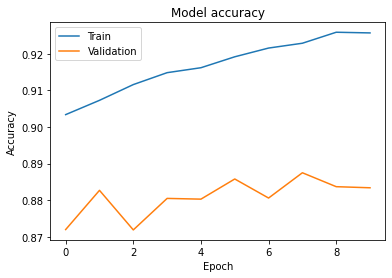

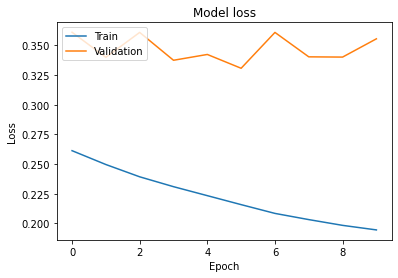

In [58]:
plot_accuracy_and_loss(history)

## Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [59]:
test_loss, test_acc = mnist_model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3556 - accuracy: 0.8834
Test accuracy: 0.883400022983551


It turns out, the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy is an example of *overfitting*. Overfitting is when a machine learning model performs worse on new data than on their training data.

## Make predictions

With the model trained, we can use it to make predictions about some images.

In [68]:
predictions = mnist_model.predict(test_data_norm)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [69]:
predictions[0]

array([4.7790846e-13, 9.5860421e-15, 3.9598887e-11, 7.9007963e-12,
       1.7000329e-12, 4.8106258e-06, 2.9401936e-10, 1.4848396e-03,
       1.3547003e-11, 9.9851030e-01], dtype=float32)

A prediction is an array of 10 numbers. These describe the "confidence" of the model that the image corresponds to each of the 10 different articles of clothing. We can see which label has the highest confidence value:



In [70]:
predictions[0].argmax()

9

So the model is most confident that this image is an ankle boot, or `class_names[9]`. And we can check the test label to see this is correct:

In [89]:
test_labels[0]

9

In [90]:
# Convert all of the prediction probabilities into integers
y_preds = predictions.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)

In [91]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [92]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                y_pred=y_preds)

array([[832,   5,  15,  34,   3,   1, 106,   0,   4,   0],
       [  0, 982,   1,  11,   4,   0,   2,   0,   0,   0],
       [ 13,   7, 797,  14, 103,   0,  65,   0,   0,   1],
       [ 17,   5,   8, 919,  29,   0,  20,   0,   1,   1],
       [  0,   0,  92,  36, 817,   0,  53,   0,   2,   0],
       [  0,   0,   0,   1,   0, 954,   0,  24,   1,  20],
       [112,   3,  93,  39,  80,   1, 669,   0,   3,   0],
       [  0,   0,   0,   0,   0,   9,   0, 956,   0,  35],
       [  7,   3,   0,   5,   6,   4,  14,   8, 953,   0],
       [  0,   0,   0,   0,   0,   9,   1,  35,   0, 955]], dtype=int64)

In [93]:
# Create a confusion matrix

import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):

    # Create the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
    n_classes = cm.shape[0]

    # Let's prettify it 
    fig, ax = plt.subplots(figsize=figsize)
    # Create a matrix plot
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    # Set labels to be classes
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # Label the axes
    ax.set(title="Confusion Matrix",
          xlabel="Predicted Label",
          ylabel="True Label",
          xticks=np.arange(n_classes),
          yticks=np.arange(n_classes),
          xticklabels=labels,
          yticklabels=labels)

    # Set x-axis labels to bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Adjust label size
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)


    # Set threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # Plot the text on each cell 
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                horizontalalignment="center",
                color="white" if cm[i, j] > threshold else "black",
                size=text_size)

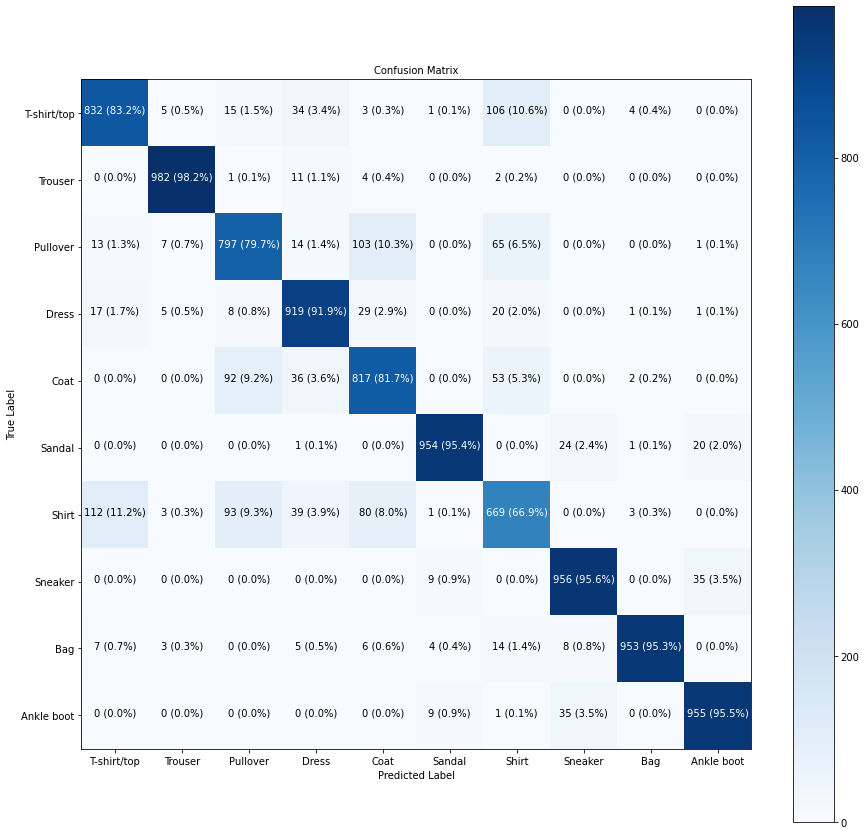

In [94]:
# Make a prettier confusion_matrix
make_confusion_matrix(y_true=test_labels,
                     y_pred=y_preds,
                     classes=class_names,
                     figsize=(15,15),
                     text_size=10)

* Plot a random image
* Make a prediction on said image
* Label the plot with the truth label & the predicted label

In [95]:
import random

def plot_random_image(model, images, true_labels, classes):
    """
    Picks a random image, plots it and labels it with a prediction and truth label.
    """
    # Set up random integer
    i = random.randint(0, len(images))
    
    # Create predictions and targets
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1, 28, 28))
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]
    
    # Plot the image
    plt.imshow(target_image, cmap=plt.cm.binary)
    
    # Change the color of the titles depending on if the prediction is right or worng
    if pred_label == true_label:
        color = "green"
    else:
        color = "red"
        
    # Add xlabel information (prediction/true label)
    plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                    100*tf.reduce_max(pred_probs),
                                                    true_label),
              color=color) # set the color to green or red based on i prediction is right or wrong

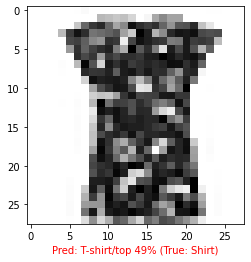

In [114]:
# Check out a random image as well as its prediction
plot_random_image(model=mnist_model,
                 images=test_data_norm, # always make predictions on the same kind of data your model was trained on
                 true_labels=test_labels,
                 classes=class_names)

### 3. Recreate [TensorFlow](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax)'s [softmax activation](https://en.wikipedia.org/wiki/Softmax_function) function in your own code. Make sure it can accept a tensor and return that tensor after having the softmax function applied to it.

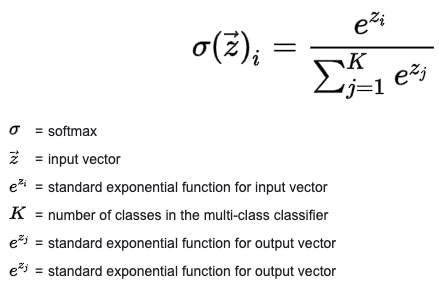

In [115]:
# Implementing a softmax function 
def softmax(x):
  '''
  Argument:
  x --> Accepts a tensor of any shape

  Returns: 
  --> softmax activations of the input tensor
  '''
  x = tf.cast(x , dtype = tf.float32) # to tackle the data type error of int32 / int64

  # Below is the forumale
  e_x = tf.math.exp(x - tf.math.reduce_max(x))
  return e_x / tf.math.reduce_sum(e_x , axis = 0)

In [116]:
# Creating sample tensor 
tensor = tf.constant([[1, 2, 3, 6],
                     [2, 4, 5, 6],
                     [3, 8, 7, 6]] )
tensor

<tf.Tensor: shape=(3, 4), dtype=int32, numpy=
array([[1, 2, 3, 6],
       [2, 4, 5, 6],
       [3, 8, 7, 6]])>

In [117]:
# Applying our softmax function 
softmax(tensor)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0.09003057, 0.00242826, 0.01587624, 0.3333333 ],
       [0.24472849, 0.01794253, 0.11731041, 0.3333333 ],
       [0.66524094, 0.9796292 , 0.8668133 , 0.3333333 ]], dtype=float32)>

### 4. Create a function (or write code) to visualize multiple image predictions for the fashion MNIST at the same time. Plot at least three different images and their prediciton labels at the same time. Hint: see the [classifcation tutorial in the TensorFlow documentation](https://www.tensorflow.org/tutorials/keras/classification) for ideas.

### 5. Make a function to show an image of a certain class of the fashion MNIST dataset and make a prediction on it. For example, plot 3 images of the `T-shirt` class with their predictions.

In [121]:
# Making predictions 
preds = mnist_model.predict(test_images)

In [122]:
# Below function is from TensorFlow Tutorials (https://www.tensorflow.org/tutorials/keras/classification#verify_predictions)

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')



def plot_prediction_images():
  num_rows = 5 
  num_cols = 3
  num_images = num_rows * num_cols 
  plt.figure(figsize = (2*2*num_cols , 2*num_rows))
  for i in range(num_images):
    plt.subplot(num_rows , 2*num_cols , 2*i+1)
    plot_image(i , preds[i], test_labels , test_images)
    plt.subplot(num_rows , 2*num_cols , 2*i+2)
    plot_value_array(i , preds[i] ,  test_labels)
  plt.tight_layout()
  plt.show



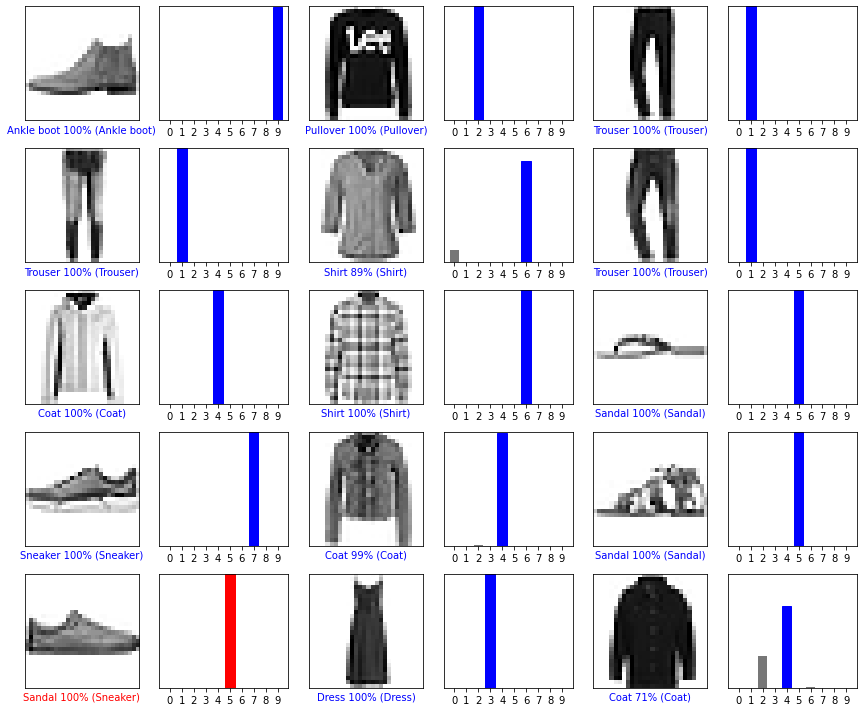

In [125]:
# Using our function
plot_prediction_images()